In [1]:
import numpy as np

from commonmethods.data_init import read_data, get_bin_files_in_dir, save_matrices_in_ascii, get_window
from commonmethods.fitter import AmplitudeFitter
from commonmethods.filtration import Filtrator
from commonmethods.voltage import number_to_voltage

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
steps_per_grows = 20
points_per_step = 4
points_per_zero = 0
number_of_cycles = 1
Av2 = [1]
amplitude_of_dc = 6

In [3]:
files = get_bin_files_in_dir(
    'C:\\Users\\ru\\Downloads\\PrBFO_14__07102017\\PrBFO_14_Point_2504\\fourier_amp_ph'
)

fitter = AmplitudeFitter(
    'C:\\Users\\ru\\Downloads\\PrBFO_14__07102017\\PrBFO_14_Point_2552\\paramiters.txt'
)
filtration_start = 0
filtrator = Filtrator(filtration_start, fitter.params['bins_number'])

In [4]:
#fits, covs = fitter.fit_files(files, filtrator)
fits, covs = fitter.fit_files(files, filtration_start)

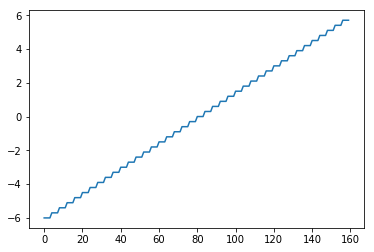

In [5]:
a1 = np.array(number_to_voltage(steps_per_grows, points_per_step, points_per_zero, number_of_cycles, amplitude_of_dc))
#print(a1)
plt.figure().add_subplot(1,1,1).plot(np.arange(len(a1)), a1)

169
1 9.43407740491e-05 -5.7


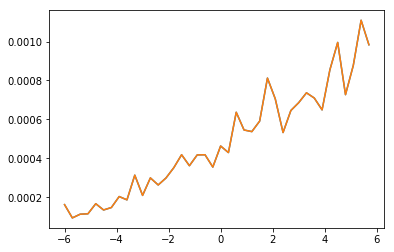

In [6]:
print(len(files))
#x = list(range(0, len(files)))
n_fits = np.array(fits)
#def avg_vals_by_volt(vals, volt, points_per_step):
    #return [np.median(chunk) for chunk in vals[:len(volt):points_per_step]]
#mid_fits = med_vals_by_volt(n_fits[:,0], volt)
mean_fits = [np.mean(chunk) for chunk in n_fits[:len(a1):points_per_step][:,0]]
med_fits = [np.median(chunk) for chunk in n_fits[:len(a1):points_per_step][:,0]]
plt.plot(a1[::4], mean_fits)
plt.plot(a1[::4], med_fits)
point = np.argmin(mean_fits)
print(point, mean_fits[point], a1[::4][point])